In [1]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

import rental_utils; reload(rental_utils)

%matplotlib inline
sns.set(style="whitegrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\philipp.deutsch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\philipp.deutsch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data, independent, test = rental_utils.load_data()
[X_train, X_val, y_train, y_val] = data

Loading raw data
Adding features
Adding regions
Adding variables
Dummyfying
Splitting data


In [3]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [4]:
preds_train, probs_train = rental_utils.predict(model, X_train)
preds_val, probs_val = rental_utils.predict(model, X_val)

ct = pd.crosstab(preds_val, y_val.values, margins=False)
print(ct)

print('')
ct_perc = ct.apply(lambda x: x/sum(x), axis=1)
print(ct_perc)

print('')
accuracy_val = float(np.sum(preds_val==y_val))/len(preds_val)
print('Validation Accuracy: ' + str(round(100*accuracy_val, 1)))
print('Log loss:            ' + str(round(log_loss(y_val, probs_val), 3)))

print('')
high_accuracy = ct_perc.iloc[0,0]
print('High Accuracy: ' + str(round(100*high_accuracy, 1)))
med_accuracy = ct_perc.iloc[2,2]
print('Medium Accuracy: ' + str(round(100*med_accuracy, 1)))
low_accuracy = ct_perc.iloc[1,1]
print('Low Accuracy: ' + str(round(100*low_accuracy, 1)))

col_0   high    low  medium
row_0                      
high     296     70     201
low      499  10682    2409
medium   455    640    1035

col_0       high       low    medium
row_0                               
high    0.522046  0.123457  0.354497
low     0.036718  0.786019  0.177263
medium  0.213615  0.300469  0.485915

Validation Accuracy: 73.8
Log loss:            0.584

High Accuracy: 52.2
Medium Accuracy: 48.6
Low Accuracy: 78.6


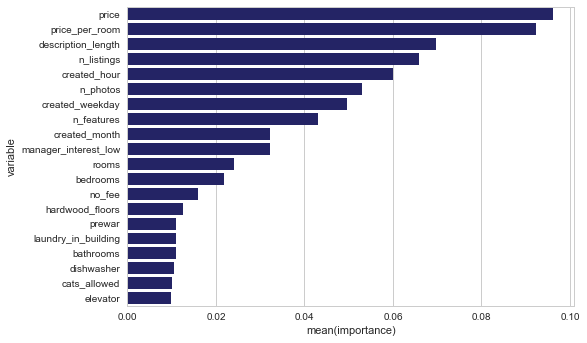

In [5]:
importance = pd.DataFrame({'variable':independent, 'importance':model.feature_importances_})
importance.sort_values(by='importance', ascending=False, inplace=True)
top_importance = importance.head(20)

sns.barplot(y='variable', x='importance', color="midnightblue", data=top_importance)

In [6]:
rental_utils.prepare_submission(model, test, independent)

Written to file Submissions/submission_2017-04-06_1457.csv
   listing_id     high  medium      low
0     7142618  0.03300  0.4650  0.50200
1     7210040  0.08350  0.1145  0.80200
2     7174566  0.01500  0.1030  0.88200
3     7191391  0.23425  0.4015  0.36425
4     7171695  0.03400  0.1690  0.79700
